### (0 баллов) Считываем данные

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_boston


dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["MEDV"] = pd.Series(dataset.target)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
X = df.drop(["MEDV"], axis=1)
y = df["MEDV"]

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [ ]:
Самый бейзлайновый бейзлайн из всех из множества бейзлайнов

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(x_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [11]:
def MSE(y_true, y_pred):
    return np.sum(np.square((y_true - y_pred))) / y_true.shape[0]

In [12]:
from sklearn.metrics import mean_squared_error

sklearn_mse = mean_squared_error(y_test, y_pred)

own_mse = MSE(y_test, y_pred)

print(f"sklearn MSE: {sklearn_mse}")
print(f"Own MSE: {own_mse}")

sklearn MSE: 14.995852876582417
Own MSE: 14.995852876582417


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [ ]:
Сложно сказать, на сколько хорошо я предсказал, ибо MSE - это квадрат. Это как раз таки один из
минусов данного функционала ошибки. 

Ну а вообще, если брать то, что среднее значение по таргету это 22.5, а RMSE = корень(MSE) = 3.87, то можно
сказать, что ошибка достаточно большая и модель не очень то хорошая...

In [ ]:
ДОДЕЛАТЬ ЗАДАЧКУ ПРО НАИВНЫЙ АЛГОРИТМ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

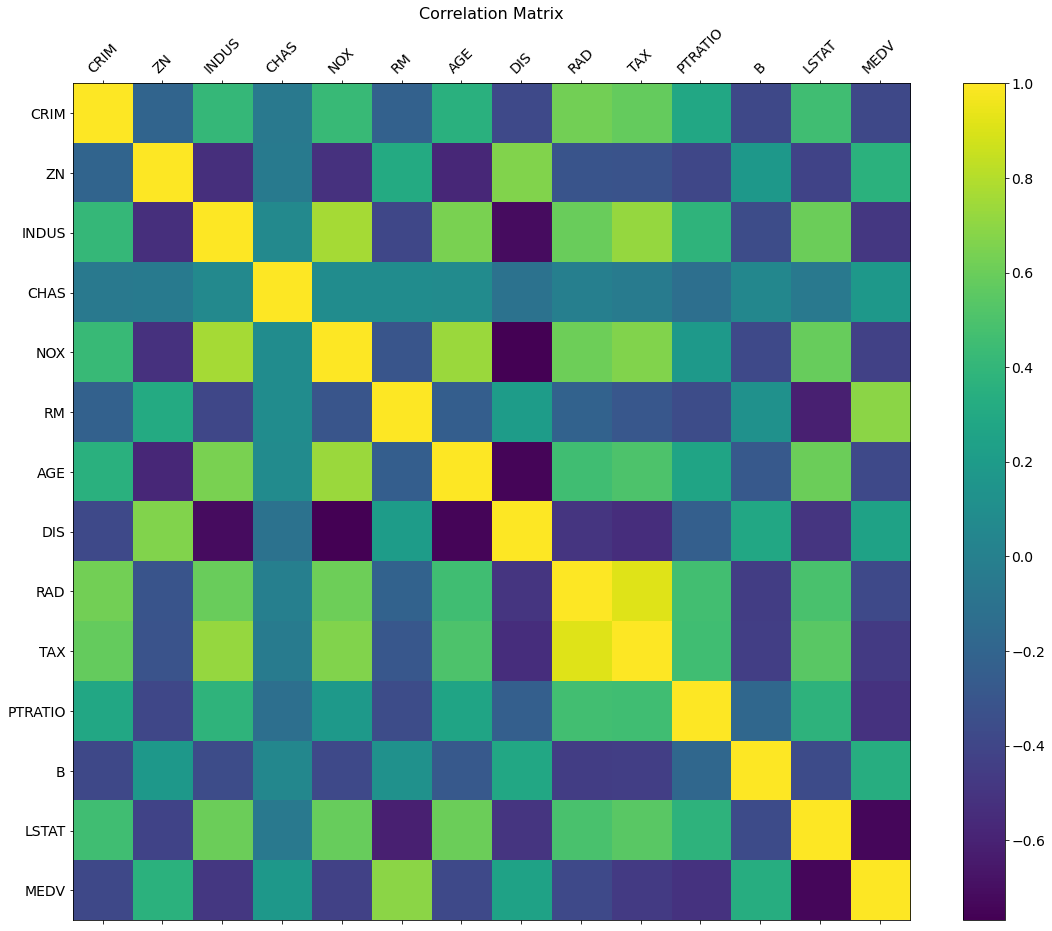

In [13]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(["MEDV"], axis=1)
y = df["MEDV"]

In [8]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [12]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

param = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False]
}

model = Ridge()

search = GridSearchCV(model, param, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)

result = search.fit(x_train, y_train)

In [13]:
y_pred_ridge = result.predict(x_test)
print(f"Ridge MSE: {mse(y_test, y_pred_ridge)}")

Ridge MSE: 14.76742218996605


In [16]:
print(result.get_params())

{'cv': RepeatedKFold(n_repeats=3, n_splits=10, random_state=1), 'error_score': nan, 'estimator__alpha': 1.0, 'estimator__copy_X': True, 'estimator__fit_intercept': True, 'estimator__max_iter': None, 'estimator__normalize': 'deprecated', 'estimator__positive': False, 'estimator__random_state': None, 'estimator__solver': 'auto', 'estimator__tol': 0.001, 'estimator': Ridge(), 'n_jobs': -1, 'param_grid': {'solver': ['svd', 'cholesky', 'lsqr', 'sag'], 'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'fit_intercept': [True, False]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': 'neg_mean_squared_error', 'verbose': 0}


Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

In [ ]:
Я использовал скалирование данных, чтобы нормализовать данные. Также использовал GridSearchCV для
подбора лучших настроек модели.
Коэффициент регуляризации, при котором ошибка оказалась минимальной - 1

А вообще, есть подозрение, что линейная регрессия не подходит для решения этой задачи.

Я вывел матрицу корреляции и можно заметить, что присутствует мультиколлинеарность(RAD, TAX). 
Я пробовал обучатьбез некоторых параметров, пробовал обучать только на тех данных, у которых
корреляция с таргетов высокая.